In [14]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
#importing libraries

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
# loading data

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
#data cleanup

At times, we will find that our data is incomplete, so we are going to have to merge it with new data. 

For instance, in the previous example, we were analysing data jobs overtime. What happens now if we want to compare jobs in the tech industry, specifically those of developers, and see how this has trended with data jobs? We can use the merge method, written in the following syntax:

- df.merge()
  
which has the key  paraneters: right, how, on.

- right: dataframe/series to merge with, added to the right of the df
- how: type of merge to be performed (left, right, outer etc.) We also see these joins in SQL (default is inner)
- on: column or index level names to join on, which must be found in both dataframes

Here, lets create the dataframe we used in the previous exercise, and import a new one

In [15]:
df_US = df[df['job_country'] == 'United States'].copy()
df_US['job_posted_month'] = df['job_posted_date'].dt.strftime('%B')
df_US.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')
jobs_US = df_US.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')
jobs_US.reset_index(inplace=True)
jobs_US['job_posted_month_num']=pd.to_datetime(jobs_US['job_posted_month'], format='%B').dt.month
jobs_US.sort_values(by='job_posted_month_num', inplace=True)
jobs_US.set_index('job_posted_month', inplace=True)
jobs_US.drop(columns= 'job_posted_month_num', inplace=True)

#dataframe 1 taken from the previous example

In [16]:
jobs_US

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114
February,447,24,6124,3060,4956,56,1258,878,1127,90
March,438,19,6218,3183,4779,59,1114,829,1150,115
April,565,40,6049,2801,4867,51,1025,781,991,112
May,279,20,4993,2976,4377,49,839,746,914,90
June,446,32,5683,2893,4645,48,1009,812,1033,93
July,581,39,5201,2570,4876,65,883,747,1095,153
August,903,39,6634,3269,6318,68,1186,903,1515,194
September,897,50,4639,3224,4568,113,805,775,1014,228


In [17]:
tech_jobs_US = pd.read_csv("https://lukeb.co/software_csv", index_col='job_posted_month')
tech_jobs_US

#dataframe 2 with technology developer jobs

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


Now, we want to add the tech_jobs_US dataframe to the right of our jobs_US dataframe and both use the index name 'job_posted_month'. Therefore:

In [18]:
US_merged = jobs_US.merge(tech_jobs_US, on='job_posted_month')
US_merged

,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114,13619,9827,5108,4348
February,447,24,6124,3060,4956,56,1258,878,1127,90,11456,9116,7298,4284
March,438,19,6218,3183,4779,59,1114,829,1150,115,11102,8178,5814,4159
April,565,40,6049,2801,4867,51,1025,781,991,112,14037,9209,7232,4220
May,279,20,4993,2976,4377,49,839,746,914,90,12126,8864,6718,4980
June,446,32,5683,2893,4645,48,1009,812,1033,93,12003,8065,5902,4781
July,581,39,5201,2570,4876,65,883,747,1095,153,11914,8061,6839,4344
August,903,39,6634,3269,6318,68,1186,903,1515,194,11571,8191,7413,4104
September,897,50,4639,3224,4568,113,805,775,1014,228,14016,8447,6139,4094


To learn more about joins, look at the Pandas cheatsheet found in pandas.pydata.org and look at the 'Combine Data Sets' section and check out his SQL course. Now we want to find the top 5 jobs based on job postings, sorted from highest to lowest: 

In [19]:
top_5 = US_merged.sum().sort_values(ascending=False).head(5)
top_5

Front-End Developer     151067
Back-End Developer      104700
Full-Stack Developer     75873
Data Analyst             67816
Data Scientist           58830
dtype: int64

To get the just the index back (so the names of the jobs without the values) in list form, we can do:

In [21]:
top_5_index = top_5.index.to_list()
top_5_index

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'Data Analyst',
 'Data Scientist']

We can now begin to plot using the following code:

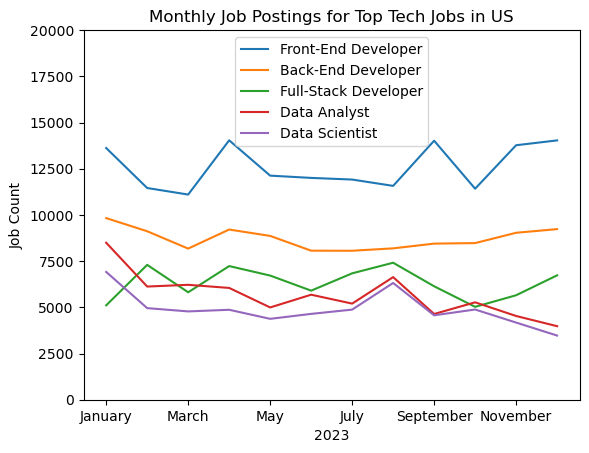

In [25]:
US_merged[top_5_index].plot(kind='line')
plt.title('Monthly Job Postings for Top Tech Jobs in US')
plt.xlabel('2023')
plt.ylabel('Job Count')
plt.ylim(0, 20000) #sets range in y axis
plt.show()

# we provide the list of index names here, which specify the columns we want plotted as these
# are columns in the US_merged dataframe

- We see that there are many more Front end and back end developer jobs, with full stack developer jobs being more in line with data jobs
- Developer jobs remain relatively steady